In [1]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.4.3”

In [2]:
#get 46-way human-specific bed-files
dir_46way = "/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/hg19_villar/"

#dir_46way = '/Users/sarahfong/Desktop/CAPRA/broadly_active_enhancers/hg19_species/'
setwd(dir_46way)

In [3]:
a = list.files()
# read in a 'seed' file to bind all the rest of the files to
df46<- read.table("hg19_villar_species_v_human_chr1.bed", sep = '\t') 
dim(df46)
head(df46)
names(df46) = c("chr", "start", "end", "strand","ref", "sp46", "sp8-villar")
a <- a[2:24]

[1] 2723537       7

V1,V2,V3,V4,V5,V6,V7
chr1,10917,11397,+,hg19,2,0
chr1,11396,11490,+,hg19,3,1
chr1,11489,11571,+,hg19,6,3
chr1,11570,11626,+,hg19,5,2
chr1,11625,11805,+,hg19,6,2
chr1,11804,11858,+,hg19,7,2


In [4]:
for (file in a) {
  table <- read.table(file, sep = '\t')
  names(table) = c("chr", "start", "end", "strand", "ref", "sp46", "sp8-villar")
  print(dim(table))
  df46<-rbind(df46, table)
  }

[1] 1587355       7
[1] 1540271       7
[1] 1557802       7
[1] 1146251       7
[1] 1061674       7
[1] 970650      7
[1] 958564      7
[1] 993537      7
[1] 899706      7
[1] 589914      7
[1] 2877091       7
[1] 734061      7
[1] 400027      7
[1] 407106      7
[1] 2359305       7
[1] 2151230       7
[1] 2082369       7
[1] 2030299       7
[1] 1796647       7
[1] 1671249       7
[1] 1372955       7
[1] 1422791       7


ERROR: Error in names(table) <- c("chr", "start", "end", "strand", "ref", "sp46", : 'names' attribute [7] must be the same length as the vector [1]


In [5]:
#calculate the length of these regions. 
df46$length = df46$end - df46$start

#log transform the length of the regions for plotting purposes. 
df46$log10_length = log(df46$length, 10)

#when 46way == 1, this region is human-specific. 
print(min(df46$sp46))

[1] 1


In [13]:
#look at the 46way hspecific data
dfh = subset(df46, df46$sp46==1)

#how many bases in the genome are unique to humans in hg19?
sum(dfh$length)
#[1] 88470858

#what % of the human genome is not alignable to other species?
sum(dfh$length)/sum(as.numeric(df46$length))
#[1] 0.03039401

write.table(dfh,"/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/hg19_human_specific_coordinates/all_hg19_human_specific_genome_coordinates.bed", sep='\t', quote =FALSE, row.names = FALSE)

dim(dfh)
summary(dfh)
#     chr            start                end            strand      ref       
# chrX   : 4701   Min.   :    15286   Min.   :    15296   +:57195   hg19:57195  
# chr1   : 4464   1st Qu.: 29422854   1st Qu.: 29422864                         
# chr7   : 4187   Median : 62128653   Median : 62140761                         
# chr2   : 3799   Mean   : 72187884   Mean   : 72189431                         
# chr5   : 3445   3rd Qu.:105696829   3rd Qu.:105696832                         
# chr4   : 2892   Max.   :249231895   Max.   :249232826                         
# (Other):33707                                                                 
#      sp46     sp9-villar     length          log10_length  
# Min.   :1   Min.   :0    Min.   :       2   Min.   :0.301  
# 1st Qu.:1   1st Qu.:0    1st Qu.:      16   1st Qu.:1.204  
# Median :1   Median :0    Median :     108   Median :2.033  
# Mean   :1   Mean   :0    Mean   :    1547   Mean   :1.964  
# 3rd Qu.:1   3rd Qu.:0    3rd Qu.:     371   3rd Qu.:2.569  
# Max.   :1   Max.   :0    Max.   :11303323   Max.   :7.053  

[1] 88470858

[1] 0.03039401

[1] 57195     9

      chr            start                end            strand      ref       
 chrX   : 4701   Min.   :    15286   Min.   :    15296   +:57195   hg19:57195  
 chr1   : 4464   1st Qu.: 29422854   1st Qu.: 29422864                         
 chr7   : 4187   Median : 62128653   Median : 62140761                         
 chr2   : 3799   Mean   : 72187884   Mean   : 72189431                         
 chr5   : 3445   3rd Qu.:105696829   3rd Qu.:105696832                         
 chr4   : 2892   Max.   :249231895   Max.   :249232826                         
 (Other):33707                                                                 
      sp46     sp9-villar     length          log10_length  
 Min.   :1   Min.   :0    Min.   :       2   Min.   :0.301  
 1st Qu.:1   1st Qu.:0    1st Qu.:      16   1st Qu.:1.204  
 Median :1   Median :0    Median :     108   Median :2.033  
 Mean   :1   Mean   :0    Mean   :    1547   Mean   :1.964  
 3rd Qu.:1   3rd Qu.:0    3rd Qu.:     371   3rd Qu.:2.

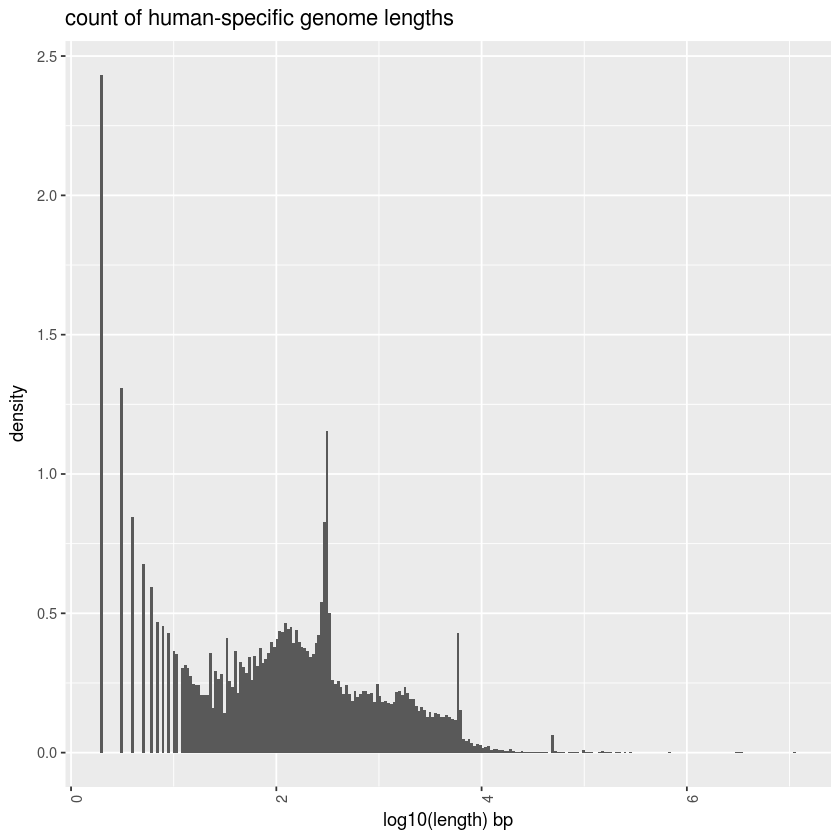

In [7]:
#length of human-specific genome regions
ggplot(dfh, aes(log10_length)) + 
  geom_histogram(aes(y=..density..),bins = 250) + 
  xlab("log10(length) bp")  +
  #xlim(0,10000) +
  ggtitle("count of human-specific genome lengths") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


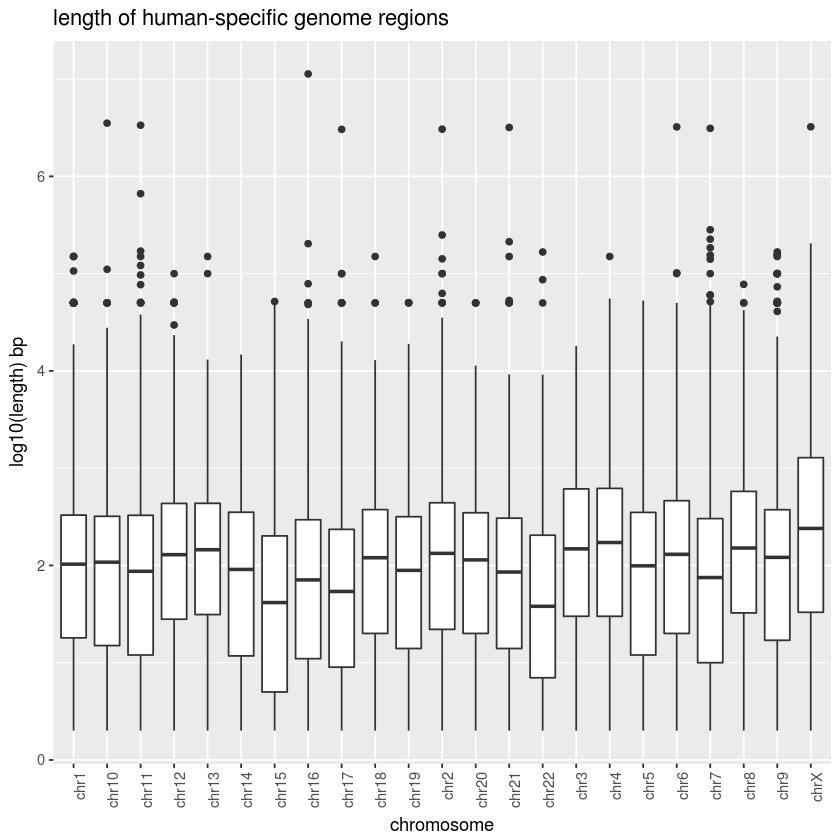

In [8]:
# plot lengths of human-specific regions of the genome by chromosome.
ggplot(dfh, aes(chr, log10_length), log10 ='y') + 
  geom_boxplot() + 
  #geom_jitter(width = 0.1)+ 
  xlab("chromosome") +
  ylab("log10(length) bp") +
  ggtitle("length of human-specific genome regions") +
  scale_y_continuous()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

#ggplot(df46, aes(sp46, color = chr)) + geom_boxplot() + scale_x_continuous() + xlab("species") + ggtitle("count of conserved regions") 

In [11]:
dfhv= dfh = subset(df46, df46$"sp8-villar"==0)
dim(dfhv)
write.table(dfhv,"/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/hg19_villar/hg19_ucsc_villar_hu-specific.bed", sep='\t', quote =FALSE, row.names = FALSE)

[1] 866199      9